## K means Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
odf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_old_customer_data.xlsx").drop('Unnamed: 0', axis = 1)

In [3]:
odf.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'full_name', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [4]:
ndf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_new_customer_data.xlsx").drop('Unnamed: 0', axis = 1)

In [5]:
ndf.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'full_name'],
      dtype='object')

---

### Calculating Recency, Frequency, Monetary (RFM)

In [7]:
import pandas as pd
from datetime import datetime


# Convert 'transaction_date' to datetime
odf['transaction_date'] = pd.to_datetime(odf['transaction_date'])

# Calculate Recency, Frequency, and Monetary values
current_date = max(odf['transaction_date'])

# Recency
recency_df = odf.groupby('customer_id')['transaction_date'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['transaction_date']).dt.days

# Frequency
frequency_df = odf.groupby('customer_id')['transaction_id'].count().reset_index()
frequency_df.columns = ['customer_id', 'Frequency']

# Monetary
monetary_df = odf.groupby('customer_id')['list_price'].sum().reset_index()
monetary_df.columns = ['customer_id', 'Monetary']

# Merge DataFrames
rfm_df = pd.merge(recency_df[['customer_id', 'Recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# Assign RFM scores
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1, 2, 3, 4])

# Combine RFM scores
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)


rfm_df


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,1,7,11,9084.45,4,4,4,444
1,2,128,3,4149.07,1,1,2,112
2,4,195,2,1047.72,1,1,1,111
3,5,16,6,5903.20,4,3,3,433
4,6,64,5,5931.69,2,2,3,223
...,...,...,...,...,...,...,...,...
3481,3496,256,4,4725.38,1,1,2,112
3482,3497,52,3,3744.07,2,1,1,211
3483,3498,127,6,5177.06,1,3,2,132
3484,3499,51,7,7673.48,2,3,3,233


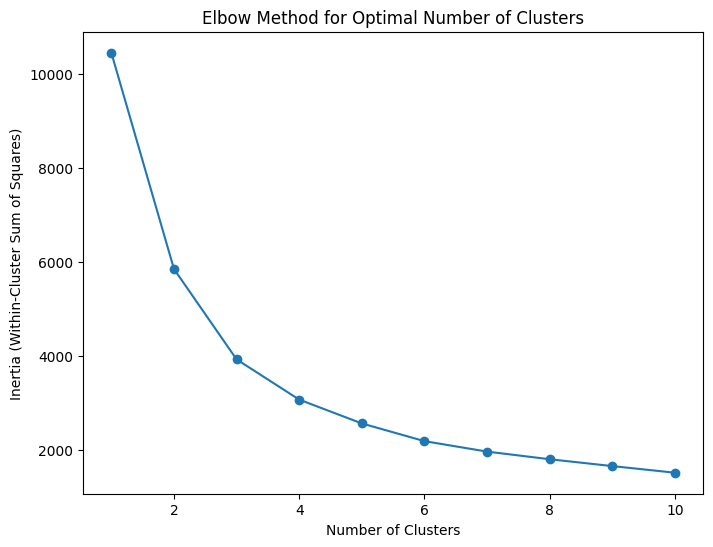

In [8]:
# Select relevant features for clustering
selected_features = ['Recency', 'Frequency', 'Monetary']

# Extract the selected features
X = rfm_df[selected_features]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
# Select relevant features for clustering
selected_features = ['Recency', 'Frequency', 'Monetary']

# Extract the selected features
X = rfm_df[selected_features]

# Scale the features (important for k-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can experiment with different values)
k = 4

# Apply k-means clustering with k-means++
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

# show DataFrame
rfm_df


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,Cluster
0,1,7,11,9084.45,4,4,4,444,2
1,2,128,3,4149.07,1,1,2,112,1
2,4,195,2,1047.72,1,1,1,111,1
3,5,16,6,5903.20,4,3,3,433,0
4,6,64,5,5931.69,2,2,3,223,0
...,...,...,...,...,...,...,...,...,...
3481,3496,256,4,4725.38,1,1,2,112,1
3482,3497,52,3,3744.07,2,1,1,211,3
3483,3498,127,6,5177.06,1,3,2,132,0
3484,3499,51,7,7673.48,2,3,3,233,0


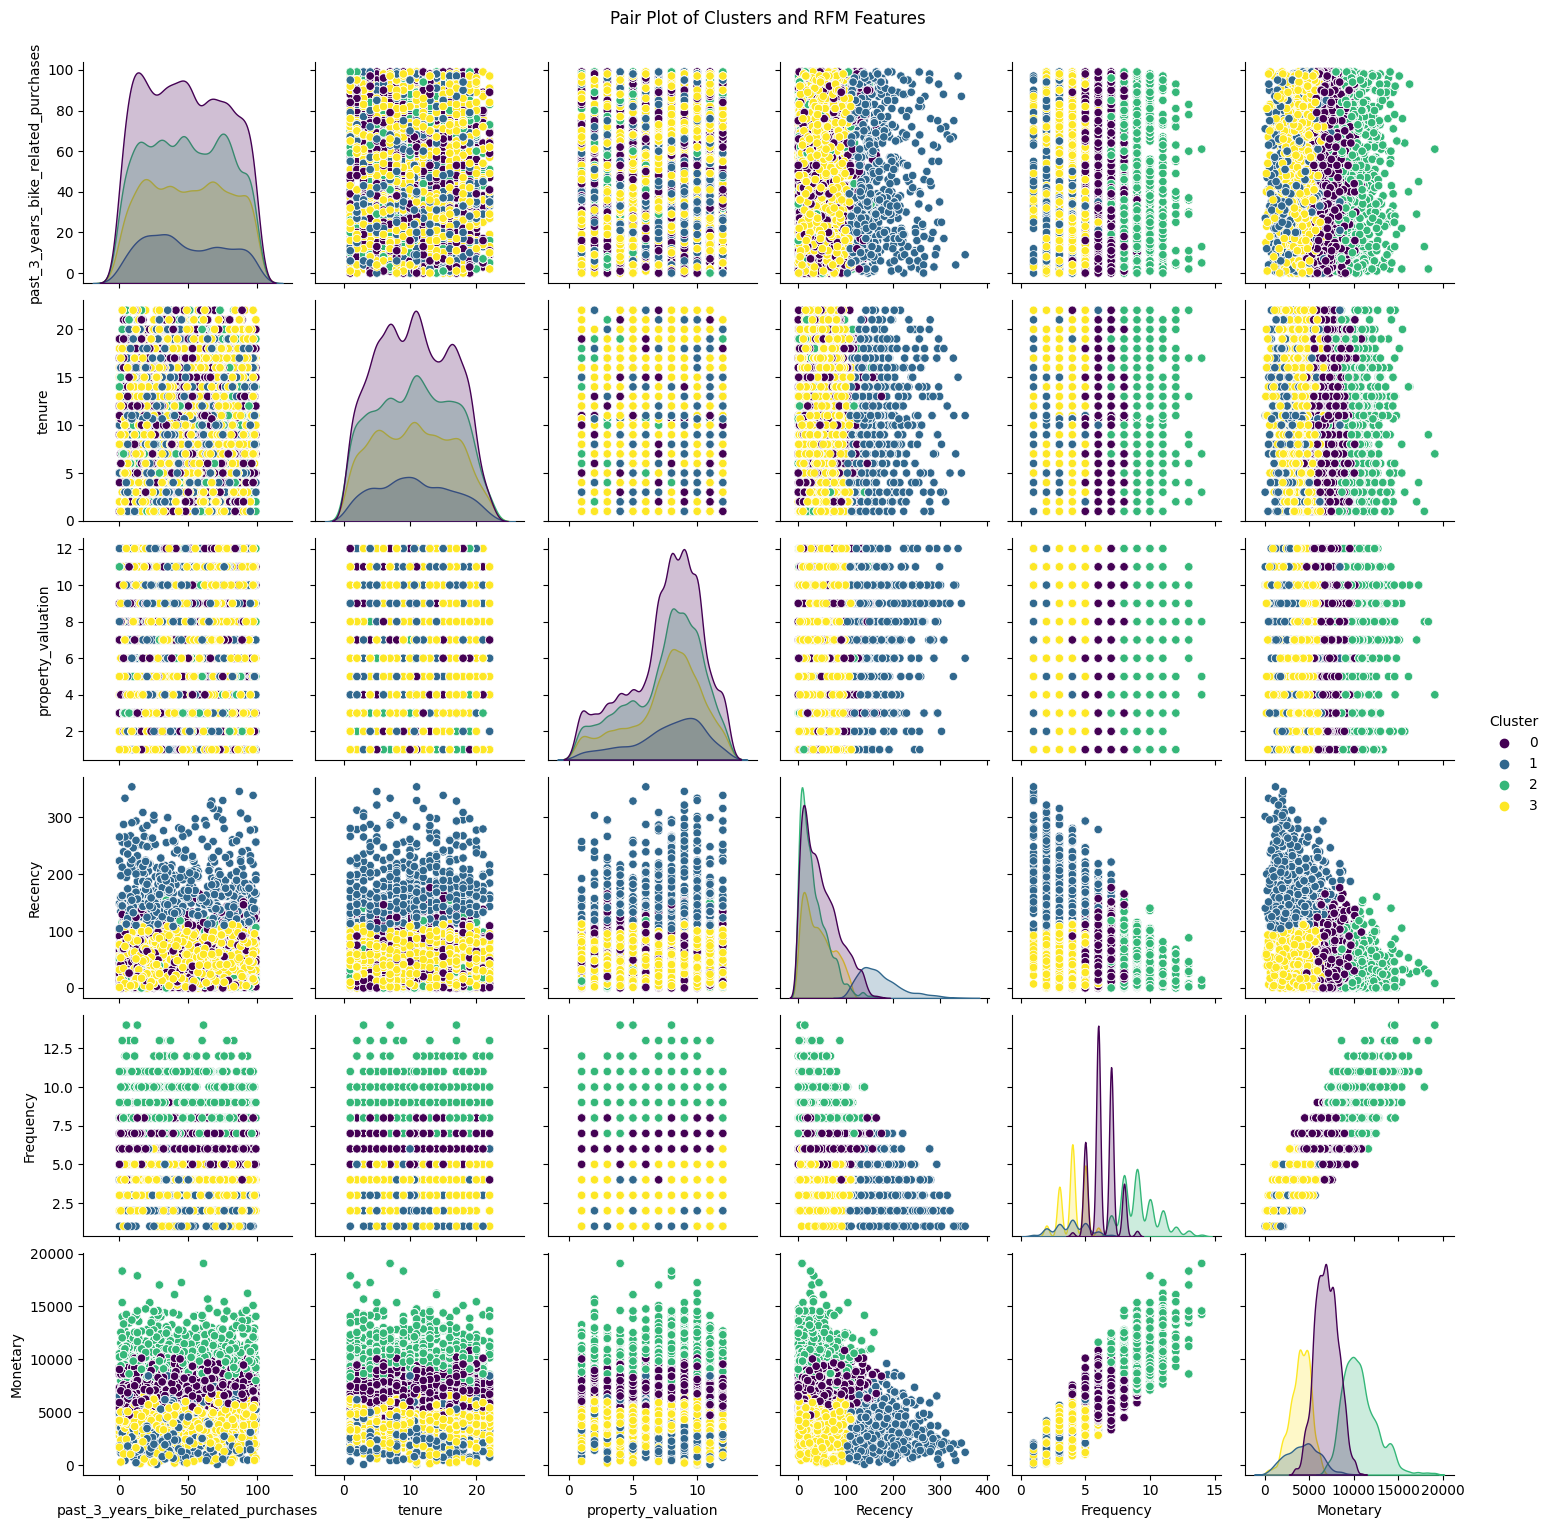

In [10]:
# Merge the two DataFrames on 'customer_id'
merged_df = pd.merge(odf, rfm_df, left_on='customer_id', right_on='customer_id', how='inner')

# Select relevant features for visualization
selected_features = ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment']

# Pair plot for selected features, colored by 'Cluster' labels
sns.pairplot(merged_df[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Clusters and RFM Features', y=1.02)
plt.show()


In [40]:
import plotly.express as px

fig = px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    title='K-means Clustering of RFM Features',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary', 'Cluster': 'Cluster'},
    size_max=1,  # Set maximum marker size
)

# Update figure layout for increased size
fig.update_layout(scene=dict(aspectmode="cube"), width=1000, height=800)

# Show the interactive plot
fig.show()


cluster 2

cluster 0
cluster 1
cluster 3

### save merged data frame for further tasks. 

In [12]:
merged_df.to_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/rfm_clustered_df.xlsx")

---------

## Finding Target Customers

### Special Analysis of Cluster 2

In [ ]:
cluster_2_df = df[df['Cluster'] == 2]

In [ ]:
# Assuming 'cluster_2_df' is your DataFrame
min_age = cluster_2_df['age'].min()
max_age = cluster_2_df['age'].max()

# Calculate dynamic age bins
age_interval = 5
age_bins = range(min_age, max_age + age_interval + 1, age_interval)

# Create age ranges
cluster_2_df['age_group'] = pd.cut(cluster_2_df['age'], 
                                bins=age_bins, 
                                labels=[f'{start}-{end - 1}' for start, end in zip(age_bins[:-1], age_bins[1:])])

ax = sns.histplot(x='age_group', data=cluster_2_df, bins=len(age_bins) - 1)

# Annotate each bar with its count, rotating the numbers vertically
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation='vertical')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)
# Add a text box at the top-right corner
plt.text(1, 1, f'Top Customers: age group (40-50)', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.show()

In [ ]:
# List of categorical features
list_of_cat_features = ['gender', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']

# Function to create countplot for a categorical feature
def count_plot(cat_feature, data):
    # Set the size of the plot
    plt.figure(figsize=(8, 6))

    # Customize Seaborn settings
    sns.set_palette("pastel")  # Change the color palette
    sns.set(style="whitegrid")  # Add grid lines

    # Create a countplot using Seaborn
    ax = sns.countplot(x=cat_feature, data=data, order=data[cat_feature].value_counts().index)

    # Add count numbers on top of each bar
    for p in ax.patches:  # to iterate over each bar in the count plot
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, color='red', weight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Remove the spines (borders) for a cleaner look
    sns.despine()

    # Add title to the plot
    plt.title(f'{cat_feature} count')

    # Display the plot
    plt.show()

# Loop through each categorical feature and create countplot
for cat_feature in list_of_cat_features:
    count_plot(cat_feature=cat_feature, data=cluster_2_df)


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='job_industry_category', data=cluster_2_df, order=cluster_2_df['job_industry_category'].value_counts().index)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.xticks(rotation= 90)
# Remove the spines (borders) for a cleaner look
sns.despine()

# Add title to the plot
plt.title('job_industry_category')

# Display the plot
plt.show()

### Finding The Target Customers from New Customers list:

Cluster 2 : 
Who to target More:
1. Mass Customers
2. From NSW
3. In `Manufacturing > Financial Services > Health Care` Job_Industry_Category
4. with age ranging from 40 - 50 as round figure. 

In [ ]:
# Assuming ndf is your DataFrame
cluster_2_criteria = (
    (ndf['wealth_segment'] == 'Mass Customer') &
    (ndf['state'] == 'NSW') &
    (ndf['job_industry_category'].isin(['Manufacturing', 'Financial Services', 'Health Care'])) &
    (ndf['age'].between(40, 50, inclusive='both'))
)

Target_customers_list = ndf[cluster_2_criteria]
Target_customers_list